In [25]:
import data_smoothing
import find_peaks
import peak_character

# Load real TA data

In [26]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp03_20180103 -t0 -chirp.csv')

# Smooth data

In [27]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


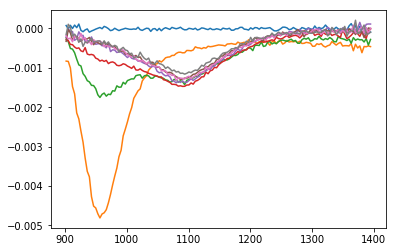

In [28]:
import matplotlib.pyplot as plt
plt.plot(data_nm, data_z[:,1::100])

# Find Peaks

In [29]:
threshold = 0
mindist = 0
idx_0, height_0, fwhm_0 = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [30]:
height_0.describe()

,0,1,2,3,4
count,760.000000,224.000000,26.000000,8.000000,1.000000
mean,-0.001416,-0.000759,-0.000068,0.000013,0.000016
std,0.000766,0.000620,0.000129,0.000055,NaN
min,-0.004840,-0.001438,-0.000357,-0.000065,0.000016
25%,-0.001415,-0.001310,-0.000044,-0.000021,0.000016
50%,-0.001309,-0.001200,-0.000019,0.000007,0.000016
75%,-0.001199,-0.000029,0.000006,0.000042,0.000016
max,0.000084,0.000092,0.000072,0.000106,0.000016


In [31]:
threshold = 0.25
mindist = 0
idx_25, height_25, fwhm_25 = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [32]:
height_25.describe()

,0,1,2,3
count,749.000000,149.000000,7.000000,3.000000
mean,-0.001437,-0.001106,0.000004,0.000008
std,0.000753,0.000456,0.000047,0.000067
min,-0.004840,-0.001438,-0.000039,-0.000065
25%,-0.001418,-0.001330,-0.000031,-0.000021
50%,-0.001311,-0.001280,-0.000022,0.000023
75%,-0.001203,-0.001203,0.000041,0.000045
max,0.000084,0.000106,0.000072,0.000066


In [33]:
threshold = 0.5
mindist = 0
idx_5, height_5, fwhm_5 = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [34]:
height_5.describe()

,0,1,2
count,735.000000,103.000000,2.000000
mean,-0.001466,-0.001224,0.000015
std,0.000732,0.000344,0.000072
min,-0.004840,-0.001438,-0.000036
25%,-0.001421,-0.001349,-0.000010
50%,-0.001315,-0.001314,0.000015
75%,-0.001205,-0.001275,0.000041
max,0.000084,0.000106,0.000066


In [35]:
threshold = 0.75
mindist = 0
idx_75, height_75, fwhm_75 = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [36]:
height_75.describe()

,0,1
count,725.000000,63.000000
mean,-0.001489,-0.001263
std,0.000716,0.000295
min,-0.004840,-0.001424
25%,-0.001424,-0.001356
50%,-0.001322,-0.001323
75%,-0.001213,-0.001290
max,0.000106,0.000092


In [37]:
threshold = 0.90
mindist = 0
idx_9, height_9, fwhm_9 = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [38]:
height_9.describe()

,0,1
count,718.000000,23.000000
mean,-0.001510,-0.001196
std,0.000702,0.000404
min,-0.004840,-0.001396
25%,-0.001425,-0.001335
50%,-0.001337,-0.001313
75%,-0.001231,-0.001280
max,0.000106,0.000092


# Classify Peaks

In [67]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def data_grouping(index_df, height_df, fwhm_df):
    peak_list = []
    
    for i in range(index_df.shape[0]):
        for j in range(index_df.shape[1]):
            peak_list.append(
            [index_df.loc[i,j], height_df.loc[i,j], fwhm_df.loc[i,j], i])
        
    all_points = pd.DataFrame(peak_list, 
    columns=['Position', 'Height', 'Width', 'Time'])
    corrected_output = all_points.fillna(value=0)
    
    return corrected_output

def cluster_classifier(index_df, corrected_output):
    found_peak = 2
    cluster = KMeans(n_clusters=found_peak).fit(corrected_output.iloc[:,:-2])
    print(cluster.labels_)
    print(cluster.cluster_centers_)
    peak_dict = {}
    
    for i in range(found_peak):
            peak_dict['peak_%s' % i] = []
            
    for j in range(corrected_output.shape[0]):
        peak = cluster.predict([corrected_output.values[j,:-2]])
        signal = corrected_output.loc[j][1]
        for k in range(found_peak):
            if (peak == k):
                peak_dict['peak_%s' % k].append(corrected_output.values[j])
                #print('found a match')

    return peak_dict

In [45]:
corrected_output_0 = data_grouping(idx_0, height_0, fwhm_0)
df_0 = corrected_output_0.drop(corrected_output_0[abs(corrected_output_0.Height) < 0.001].index)
df_0.describe()

,Position,Height,Width,Time
count,824.000000,824.000000,824.000000,824.000000
mean,46.604369,-0.001502,171.134871,401.241505
std,15.374112,0.000627,40.356838,203.826156
min,15.000000,-0.004840,75.358000,88.000000
25%,49.000000,-0.001408,158.372500,218.750000
50%,55.000000,-0.001318,165.260000,373.500000
75%,56.000000,-0.001228,178.964000,579.250000
max,58.000000,-0.001019,278.493000,785.000000


In [46]:
corrected_output_25 = data_grouping(idx_25, height_25, fwhm_25)
df_25 = corrected_output_25.drop(corrected_output_25[abs(corrected_output_25.Height) < 0.001].index)
df_25.describe()

,Position,Height,Width,Time
count,824.000000,824.000000,824.000000,824.000000
mean,46.604369,-0.001502,171.134871,401.241505
std,15.374112,0.000627,40.356838,203.826156
min,15.000000,-0.004840,75.358000,88.000000
25%,49.000000,-0.001408,158.372500,218.750000
50%,55.000000,-0.001318,165.260000,373.500000
75%,56.000000,-0.001228,178.964000,579.250000
max,58.000000,-0.001019,278.493000,785.000000


In [51]:
corrected_output_5 = data_grouping(idx_5, height_5, fwhm_5)
df_5 = corrected_output_5.drop(corrected_output_5[abs(corrected_output_5.Height) < 0.001].index)
df_5 = df_5.reset_index(drop=True)
df_5.describe()

,Position,Height,Width,Time
count,794.000000,794.000000,794.000000,794.000000
mean,46.569270,-0.001513,172.540824,410.513854
std,15.654316,0.000636,40.427517,201.858260
min,15.000000,-0.004840,75.358000,88.000000
25%,51.000000,-0.001411,161.760000,230.000000
50%,55.000000,-0.001323,168.643000,388.500000
75%,56.000000,-0.001235,182.363000,586.750000
max,58.000000,-0.001019,278.493000,785.000000


In [53]:
corrected_output_75 = data_grouping(idx_75, height_75, fwhm_75)
df_75 = corrected_output_75.drop(corrected_output_75[abs(corrected_output_75.Height) < 0.001].index)
df_75 = df_75.reset_index(drop=True)
df_75.describe()

,Position,Height,Width,Time
count,758.000000,758.000000,758.000000,758.000000
mean,46.616095,-0.001526,173.460897,420.346966
std,15.826223,0.000647,40.283201,201.244542
min,15.000000,-0.004840,75.358000,88.000000
25%,52.000000,-0.001417,161.780000,240.000000
50%,55.000000,-0.001330,168.643000,406.500000
75%,56.000000,-0.001236,185.791000,595.750000
max,58.000000,-0.001056,271.612000,785.000000


In [49]:
corrected_output_9 = data_grouping(idx_9, height_9, fwhm_9)
df_9 = corrected_output_9.drop(corrected_output_9[abs(corrected_output_9.Height) < 0.001].index)
df_9.describe()

,Position,Height,Width,Time
count,719.000000,719.000000,719.000000,719.000000
mean,47.264256,-0.001544,173.875433,430.468707
std,15.571105,0.000660,39.890194,201.696140
min,15.000000,-0.004840,75.358000,88.000000
25%,53.000000,-0.001425,161.780000,246.500000
50%,56.000000,-0.001338,168.643000,426.000000
75%,56.000000,-0.001243,189.220000,605.500000
max,58.000000,-0.001056,261.252000,785.000000


In [68]:
peak_dict_5 = cluster_classifier(idx_5, df_5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [70]:
peak_dict_75 = cluster_classifier(idx_75, df_75)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Visualize Peak Dynamics

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize(peak_dict):
    for i in range(len(peak_dict)):
        df = pd.DataFrame(peak_dict['peak_%s' % i], 
        columns=['Position', 'Height', 'Width', 'Time'])
        
        plt.subplot(3, 1, 1)
        plt.plot(df['Time'], df['Height'], 'o')
        plt.title('Peak %s Dynamics' % (i+1))
        plt.ylabel('Intensity')

        plt.subplot(3, 1, 2)
        plt.plot(df['Time'], df['Position'], 'o')
        plt.ylabel('Position')

        plt.subplot(3, 1, 3)
        plt.plot(df['Time'], df['Width'], 'o')
        plt.ylabel('Width')
        plt.xlabel('Time')
        plt.show()
    return

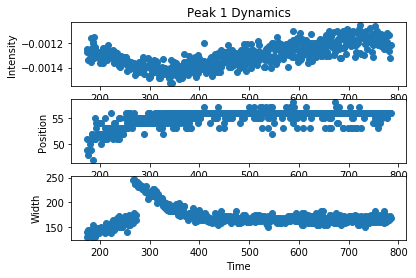

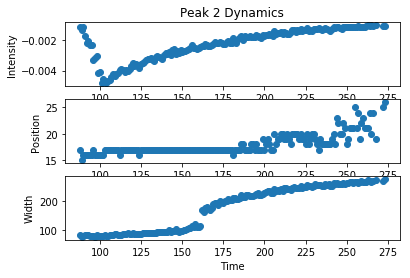

In [69]:
output_5 = visualize(peak_dict_5)

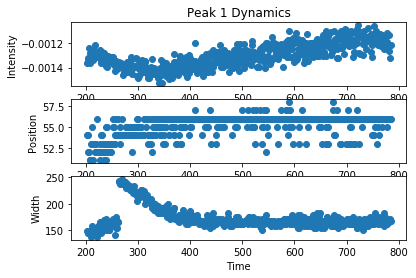

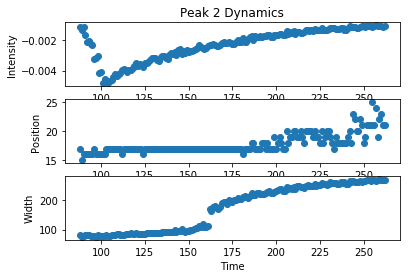

In [71]:
output_75 = visualize(peak_dict_75)

In [72]:
data_nm[15]

952.895

In [73]:
data_nm[25]

987.167

In [75]:
data_nm[52]

1079.92

In [76]:
data_nm[58]

1100.58